In [3]:
import pandas as pd
from random import randrange
from random import  seed
import numpy as np

### Le travail fait dans ce document à utiliser le cours de 'Naive Bayes text classification' de Standford
### lien https://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html



# Pretraitement des données

In [4]:
#importation du dataset
data = pd.read_csv("spam.csv",encoding="Windows-1252")

In [5]:
#on visualise les 5 premieres ligne
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#Mesure statistique
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [7]:
#on constate qu'il y 3 colonnes contenant un tres grand nombre de données manquantes dans 
# le jeu de données donc on peut les supprimer

data =data.drop(columns=["Unnamed: 2","Unnamed: 3" ,"Unnamed: 4"])

In [8]:
# visualise les 5 permieres lignes
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Distribution des classes

<AxesSubplot:>

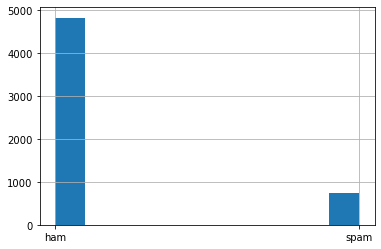

In [9]:
data.v1.hist()

# Interpretation 1

## Vue la courbe si dessus , on constate que la proportion des messages non spam est très élévé par rapport au ceux qui sont span

# Traitement des valeurs manquantes

In [10]:
data.isna().sum() #aucune valeur manquante

v1    0
v2    0
dtype: int64

## Nous constatons que notre jeu de données ne contient aucune valeur manquante

# pretraitement

### Nous allons éliminer les les pontuations et les stopWords qui peuvent influencer l apprentissage
### un stop word est un mot de la langue qui est fréquenment très utilisé par les personnes
### Nous allons également éliminer uniformisé les mots du text , car pour dans notre cas , un mot en 
### majuscule est le meme en minuscule 
### Exemple en Francais : le ,la les

In [11]:
#pour éliminer les ponctuations , nous allons utilisé la libraire regex de python
import re  #importation de regex
import nltk
from nltk.corpus import  stopwords 

In [12]:
def pretraitement_test(text):
    text_a = re.sub('[^a-zA-Z]',' ', text) #suppression des pontuations
    text_a = re.sub('\...',' ', text)
    text_a = text_a.lower() #convertir le texte en minuscule
    text_split = text_a.split()
    '''
        on parcourt le jeu document si le mot trouvé est présent dans les stopword alors on l'enleve
    '''
    for word in text_split: #suppression des stopword
        if(  word in set(stopwords.words('english'))):
            text_split.remove(word)

    return listToString(text_split)


def listToString(list_data):
    str1 =""
    return (str1.join(' ').join(list_data))


In [13]:
#on applique le pretraitement sur les données
data['clean_mail'] = data.v2.apply(pretraitement_test)

In [14]:
data.head()

,v1,v2,clean_mail
0,ham,"Go until jurong point, crazy.. Available only ...","go jurong point, crazy available in bugis n gr..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah don't think goes usf, lives around though"


In [15]:
#binarisation de la classe y: target vecteur

def binarisation(test_labels):
    target= []
    for label in test_labels :
        if label =="ham":
            target.append(0)
        else:
            target.append(1)
    return target

#binarisation_target()

In [16]:
def matrice_de_confusion(predict_data ,real_data):
    '''
        cette methode permet de donner la matrice de confusion 
    '''
    if(len(predict_data)) != len(real_data):
        raise ValueError("predict data and real data must have same name")
    dic={
            "vp":0,
            "vn":0,
            "fp":0,
            "fn":0
        }
    for i in range(len(predict_data)):
        if(predict_data[i]==1 and real_data[i]==1 ):
            dic["vp"] =1+ dic["vp"]
        elif(predict_data[i] ==0 and real_data[i] ==0):
            dic["vn"] =1+ dic["vn"] 
        elif (predict_data[i] == 1 and real_data[i] ==0):
            dic["fp"]=1+ dic["fp"]
        elif (predict_data[i]==0 and real_data[i]==1):
            dic["fn"] =1+ dic["fn"]
    return dic

# Application de Naive Bayes

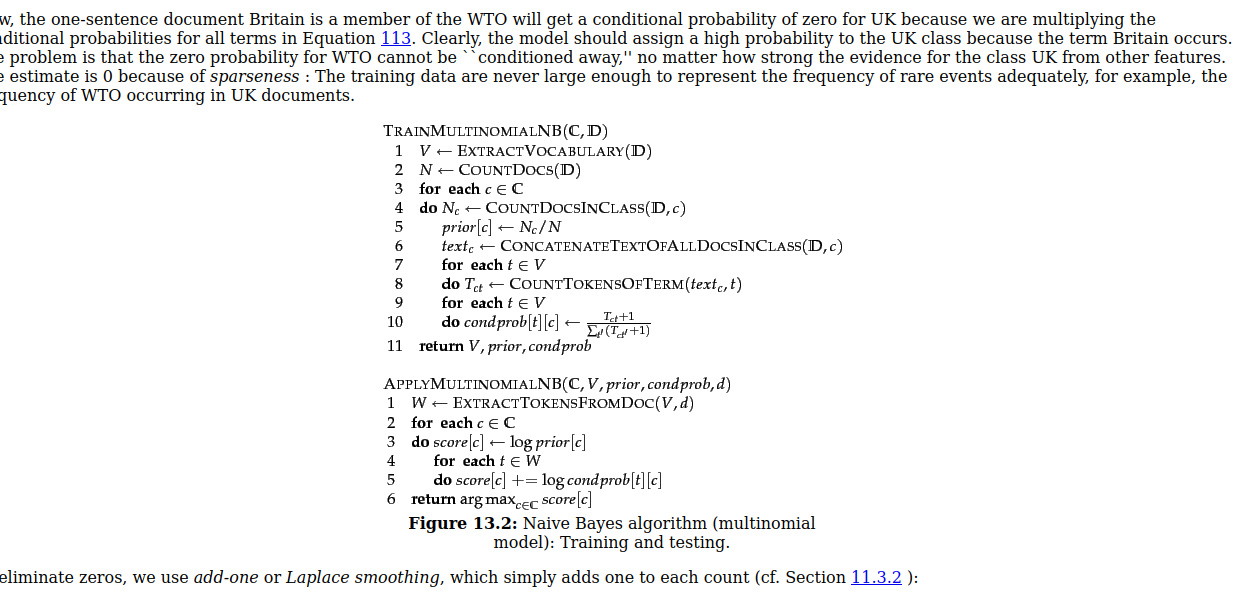

In [17]:


class naiveBayes :
    '''
        le cette methode sert de constructeur 
    '''
    def __init__(self,data, target):
        self.data = data
        self.target = target

#binarisation de la classe y: target vecteur

    def binarisation_target(self):
        '''
            puisque nous sommes en classification binaire , il est préferable de travailler
            avec 0 et 1
            Ici , on donne 0 à la classe 'non spam' et 1 à la classe 'spam'
        '''
        target_bin= []
        for label in self.target :
            if label =="ham":
                target_bin.append(0)
            else:
                target_bin.append(1)
        self.target = target_bin

    def countDocsInclass(self , y , c):
        '''
            cette methode permet de compter le nombre d'occurence d'un texte dans une classe
        '''
        counter = 0
        for e in y:
            if c== e :
                counter = counter+ 1
        return counter
    
    def extractVocabulary(self , data):
        '''
            cette methode permet d'extraire le vocabulaire générale du jeu de 
            données sans redondance
        '''
        vocabulary = []
        for x in data:
            x_split = x.split()
            for word in x_split:
                if(word not in vocabulary):
                    vocabulary.append(word)
        return vocabulary
    
    def concatenateTextOfAllDocsInClass(self ,text_c , c):
        text_classe = []
        for i in range(len(text_c)) :
            txt_split = text_c[i][0].split()
            for word in txt_split:
                text_classe.append(word)
        return text_classe
    
    def countTokenOfTerm(self,textc , t):
        counter =0
        for txt in textc :
            if txt == t:
                counter = counter+1
        return counter
        
        
    def train(self):
        '''
            cette méthode permet de construire le modele
        '''
        self.binarisation_target()
        vocabulary = self.extractVocabulary(self.data) # on recupere le vocabulaire du dataset
        N = self.data.shape[0] #nombre total de document dans le dataset
        proba_apriori_c = {}
        target_value = np.unique(self.target) #on recupere les labels présents dans la target
        
        #nous devons maintenant passer à une separation du jeu de données par classe
        separate_data = [[],[]]
        conditionnal_probability = {}
        Tct ={}
        for c in target_value:
            Tct[c] = {}
            conditionnal_probability[c] = {} 
            proba_apriori_c[c] = {}
            Nc = self.countDocsInclass(self.target ,c)
            for z in zip(self.data ,self.target):
                if c == z[1] :                 
                    separate_data[c].append(z)# a ce niveau on separe le dataset en  classe

            proba_apriori_c[c] = Nc /N    #ici on calcule la probabilité apriori pour la classe donnee

            textc  = self.concatenateTextOfAllDocsInClass(separate_data[c],c) # on regroupe tous les textes présents dans c
            for t in vocabulary: 
                
                # pour un mot donné dans le vocabulaire , on calcule sa frequence d'apparution dans la classe c
                Tct[c][t] =self.countTokenOfTerm(textc , t)

                # on calcule la probabilté que le mot  apparaisse dans une classe c
                # en utilisant le lissage de laplace qui resoud le probleme de probabilité nulle
                # en ajoutant 1 au numérateur et N + nombre de mot de present dans c au denominateur 
                conditionnal_probability[c][t] = (Tct[c][t] + 1)/(N + len(separate_data[c]))
        return vocabulary ,proba_apriori_c, conditionnal_probability

    def predict(self, vocabulary ,proba_apriori, conditionnal_probability, data_pre):
        '''
            cette methode permet de faire de la prediction 
            on calcul la probabilité aposteori correspondant à chaque classe et on choisit la classe max 
        '''
        score ={}
        y_predict = []

        '''
            nous avons utilisé le logarithme car  en effect
            c  = argmax(P(c) * P(X/c)) du calcul de P(c) * P(X/c) nombreuses probabilités conditionnelles 
            sont multipliées .Cela peut entraîner un sous-dépassement en virgule flottante ainsi Ca vaut 
            donc mieux faire le calcul en ajoutant logarithmes des probabilités au lieu de multiplier 
            probabilités
        '''
        for newText in data_pre:
            for c in np.unique(self.target): #pour chaque classe on calcule la proba
                score[c] = np.log(proba_apriori[c])
                for word in newText.split():
                    if word in vocabulary:
                        score[c] = score[c]+ np.log(conditionnal_probability[c][word])
            y_predict.append(max(score , key=score.get))
            score = {}
        return y_predict

 

In [18]:
from sklearn.model_selection import train_test_split
'''
    on  utilise train_test_split de sklearn pour effectuer le holdout sur notre dataset
'''
res = train_test_split(data.clean_mail , data.v1 , 
                            train_size = 0.8,
                            test_size = 0.2,
                            random_state = 42,
                            stratify = data.v1 )

train_data ,test_data , train_labels ,test_labels = res

'''
    On utilise le modele de naive Bayes
'''
nb = naiveBayes(train_data , train_labels)
a ,b,c = nb.train() # on construit le modèle

In [19]:
pre =nb.predict(a , b, c , test_data ) # on predit la classe
test_labels  = binarisation(test_labels)


In [20]:
'''
    On recupere la matrice de confusion
'''
confusion = matrice_de_confusion(pre , test_labels)
print(" La matrice de confusion est " ,confusion)

 La matrice de confusion est  {'vp': 123, 'vn': 963, 'fp': 3, 'fn': 26}


In [21]:
''' 
    on calcule les mesures d'evaluations du modele
'''
def mesure(Mc):
    accuracy = (Mc['vp']+ Mc['vn'])/(Mc['vp'] + Mc['vn']+ Mc['fp'] + Mc['fn'])
    precision = Mc['vp']/ (Mc['vp'] + Mc['fp'])
    rappel = Mc['vp']/(Mc['vp']+ Mc['fn'])
    fmesure = 2* (precision * rappel)/ (precision + rappel)
    return accuracy , precision , rappel , fmesure

a,p ,r , f = mesure(confusion)
print(" L' accuracy du modele est  :" ,a )
print(" La precision  du modele est  :" ,p )
print(" Le rappel du modele est  :" ,r )
print(" La F-mesure du modele est  :" ,f )

 L' accuracy du modele est  : 0.9739910313901345
 La precision  du modele est  : 0.9761904761904762
 Le rappel du modele est  : 0.825503355704698
 La F-mesure du modele est  : 0.8945454545454544
